In [1]:
import numpy as np
from qiskit import *
from qiskit.transpiler import PassManager, preset_passmanagers
from qiskit.transpiler.passes.optimization import TemplateOptimization, Collect2qBlocks, CollectMultiQBlocks
from qiskit.transpiler.passes.optimization.template_matching import *
from qiskit.converters import circuit_to_dag, circuit_to_dagdependency, dagdependency_to_circuit, dagdependency_to_dag
from qiskit.visualization import dag_drawer
from qiskit.quantum_info import Operator
import os
from qiskit import QuantumCircuit

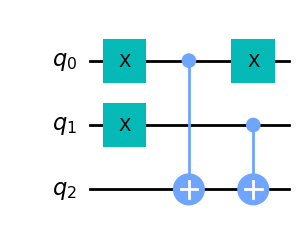

In [2]:
qreg_q = QuantumRegister(3, 'q')

template_1 = QuantumCircuit(qreg_q)

template_1.x(qreg_q[0])
template_1.x(qreg_q[1])
template_1.cx(qreg_q[0], qreg_q[2])
template_1.cx(qreg_q[1], qreg_q[2])
template_1.x(qreg_q[0])

template_1.draw('mpl')

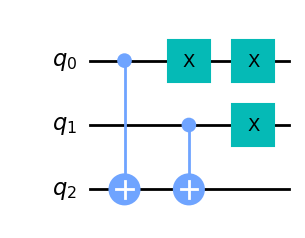

In [3]:
template_2 = QuantumCircuit(qreg_q)

template_2.cx(qreg_q[0], qreg_q[2])
template_2.cx(qreg_q[1], qreg_q[2])
template_2.x(qreg_q[0])
template_2.x(qreg_q[0])
template_2.x(qreg_q[1])

template_2.draw('mpl')

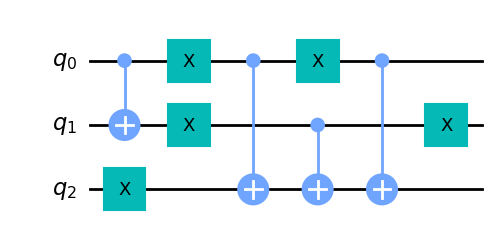

In [4]:
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.x(qreg_q[1])

circuit.draw('mpl')

In [5]:
template_1_dagdep = circuit_to_dagdependency(template_1)
dag_drawer(template_1_dagdep, filename='template.jpg')

In [6]:
circuit_dagdep = circuit_to_dagdependency(circuit)
dag_drawer(circuit_dagdep, filename='circ.jpg')